<a href="https://colab.research.google.com/github/fateme-karami/online-retail-predict/blob/main/marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Load and preprocess data
# Reloading the dataset
data = pd.read_csv('/content/sample_data/marketing_campaign (1).csv', delimiter='\t')
print(data.columns)
# Fill missing values in 'Income' with the median
data['Income'].fillna(data['Income'].median(), inplace=True)

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)

# Select columns relevant for factor analysis based on customer behavior
selected_columns = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]
factor_data = data_encoded[selected_columns]

# Standardize the data for better accuracy in factor analysis
scaler = StandardScaler()
factor_data_scaled = scaler.fit_transform(factor_data)

# Step 2: Perform Factor Analysis
# Choosing 3 factors based on the Scree Plot analysis and Kaiser's Criterion:
# - The Scree Plot showed a significant drop in eigenvalues after the third component.
# - According to Kaiser's Criterion, we retain components with eigenvalues > 1, which is satisfied for the first 3 factors.

factor_model = FactorAnalysis(n_components=3, random_state=0)
factors = factor_model.fit_transform(factor_data_scaled)

# Display factor loadings to see how each original feature contributes to the factors
print("Factor loadings:")
print(factor_model.components_)

# Display the factor scores for the first 5 data points
print("\nFactor scores (first 5 rows):")
print(factors[:10])


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


<ipython-input-5-e7693ac4e69e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)


Factor loadings:
[[ 0.72554165  0.01555696  0.74896864  0.67418568  0.78831305  0.70162451
   0.67028197  0.53251468 -0.08562074  0.53298038  0.80533316  0.71574852
  -0.61532735]
 [ 0.01782132  0.01537636 -0.32405778  0.17233536  0.16499853  0.19900224
   0.13641228 -0.14225685 -0.48739006 -0.562492    0.01829543 -0.20352195
  -0.44733691]
 [ 0.21272024  0.02009156  0.21288393 -0.30043415  0.09333959 -0.29860059
  -0.29115431 -0.20566822 -0.08362654 -0.15111116  0.14098064  0.02888518
  -0.19845145]]

Factor scores (first 5 rows):
[[ 1.55495354 -0.24372055 -1.29810148]
 [-0.86328591  0.69362478  0.38464728]
 [ 0.64507294 -0.34442665 -0.44305079]
 [-0.91443276  0.34648963 -0.08330533]
 [ 0.02228719 -0.1517355  -0.27084561]
 [ 0.32754549 -0.76414332  0.29386131]
 [ 0.27059822 -0.47778851 -0.80833989]
 [-0.83049525 -0.30609132 -0.2966689 ]
 [-1.08829265 -0.07560023 -0.30768024]
 [-1.8396644  -1.27055622 -1.45981062]]


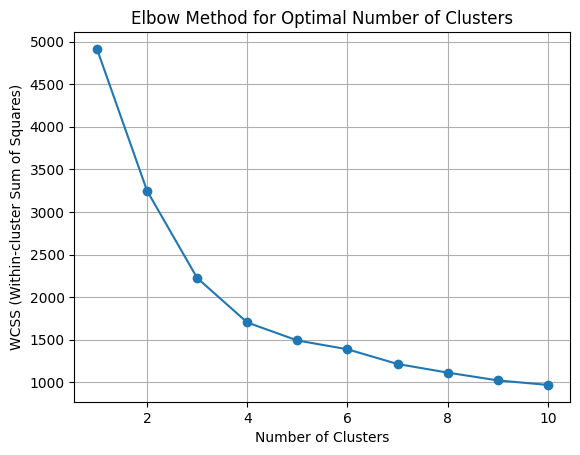

Cluster assignments (first 5 rows):
[1 0 2 0 0]


In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Use factor scores from factor analysis for clustering
# Using the factors as input for clustering
X = factors  # This is the output from the Factor Analysis with 3 factors

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []  # List to hold the within-cluster sum of squares

# Try different cluster numbers to find the optimal one
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia: sum of squared distances to the nearest cluster center

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Step 3: Fit K-Means with the selected number of clusters (choose based on elbow plot)
optimal_clusters = 3  # For example, based on Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(X)

# Display the cluster assignments for the first 5 data points
print("Cluster assignments (first 5 rows):")
print(clusters[:5])
